Map loaded: 7x7
Start position: (0, 0)
Goal position: (6, 6)
Nainicializovana mapa:  [[1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3]]
vzdialenosti:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (0, 4): 4, (0, 5): 5, (0, 6): 6, (1, 0): 1, (1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5, (1, 5): 6, (1, 6): 7, (2, 0): 2, (2, 1): 3, (2, 2): 4, (2, 3): 5, (2, 4): 6, (2, 5): 7, (2, 6): 8, (3, 0): 3, (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 0): 4, (4, 1): 5, (4, 2): 6, (4, 3): 7, (4, 4): 8, (4, 5): 9, (4, 6): 10, (5, 0): 5, (5, 1): 6, (5, 2): 7, (5, 3): 8, (5, 4): 9, (5, 5): 10, (5, 6): 11, (6, 0): 6, (6, 1): 7, (6, 2): 8, (6, 3): 9, (6, 4): 10, (6, 5): 11, (6, 6): 12}
Paths:  [[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (6, 4), (6, 5), (6, 6)]]


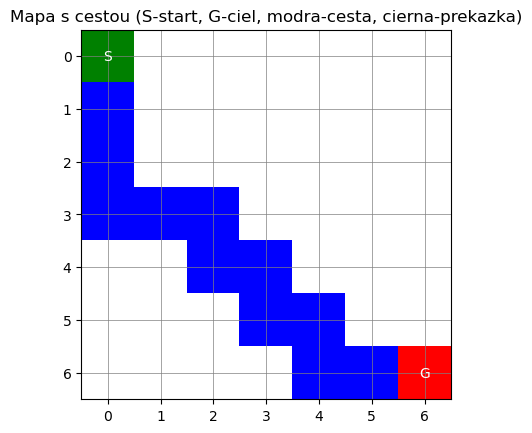

In [9]:
#!pip install networkx numpy random heapq collections deque Counter matplotlib

import networkx as nx
import numpy as np
import random
import heapq
import matplotlib.pyplot as plt
from collections import deque, Counter

class PathFinder:
    def __init__(self, map, start, goal):
        self.map = map
        self.start = start
        self.goal = goal

    def heuristic(self, node, goal):
        """
        Vypocita manhattan distance pre current node a vrati vzialenost.
        = abs(x1 - x2) + abs(y1 - y2)
        """
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    
    def get_neighbors(self, node):
        """
        Tato funkcia zisti susedov pre node a vrati ich suradnice.
        - podla toho kde sa nachadza node
        - vrati susedov len ak nie su out of bounds
        - filtruje prekazky: ak sused ma hodnotu 2
        """
        neighbors = []
        node_x = node[0] # riadok
        node_y = node[1] # stlpec

        # skontroluj hore ak neni v prvom riadku
        if node_x > 0:
            neighbors.append((node_x - 1, node_y))
        # skontroluj dole ak neni v poslednom riadku
        if node_x < len(self.map) - 1:
            neighbors.append((node_x + 1, node_y))
        # skontroluj vpravo ak neni v poslednom stlpci
        if node_y < (len(self.map[0]) - 1):
            neighbors.append((node_x, node_y + 1))
        # skontroluj vlavo ak neni v prvom stlpci
        if node_y > 0:
            neighbors.append((node_x, node_y - 1))

        # kontrola prekazok
        filtered_neighbors = []
        for neighbor_tuple in neighbors:
            x, y = neighbor_tuple
            if self.map[x][y] != 2:
                filtered_neighbors.append(neighbor_tuple)
        
        
        return filtered_neighbors
    
    def greedy_best_first_search(self, start, goal):
        aktualny_riadok, aktualny_stlpec = start
        path = [(aktualny_riadok, aktualny_stlpec)] # ulozenie path

        current_heuristic = self.heuristic(start, goal)

        while current_heuristic != 0:
            neighbors = self.get_neighbors((aktualny_riadok, aktualny_stlpec))
            #print("Susedia: ", neighbors)
            
            # dalsi bod vyberame podla heuristiky
            candidates = []
            for neighbor in neighbors:
                cur_h = self.heuristic(neighbor, goal)
                if cur_h < current_heuristic:
                    candidates.append(neighbor)

            # zo susedov vyberame nahodne
            try:
                selected_node = random.choice(candidates)
            except:
                # TODO: pridat ked su rovnaki susedia resp. neni mensia heuristika, co v tomto pripade neplati
                # ale moze sa to >>teoreticky<< stat pri vela prekazkach alebo podivnom grafe/podivnej mape
                print("Nenasiel sa ziadny kandidat")
                print("Path until now: ", path)
                break

            aktualny_riadok, aktualny_stlpec = selected_node
            path.append(selected_node)
            # backtracking netreba -> sme hovada -> treti smrtelny hriech
            # nastavime heuristicku hodnotu na bod do ktoreho sme sa "dostali"
            current_heuristic = self.heuristic((aktualny_riadok, aktualny_stlpec), goal)


        return path

    def dijkstra(self, start, goal):
        aktualny_riadok, aktualny_stlpec = start
        path = [(aktualny_riadok, aktualny_stlpec)] # ulozenie path

        unvisited = set() # set nenavstivenych bodov
        vzdialenosti = {} # vzdialenosti od startu (dict)
        predchodcovia = {} # predchodcovia (dict)
        # nastav kazdemu node vzdialenost na nekonecno (ale start ma 0)
        for i in range(len(self.map)):
            for j in range(len(self.map[0])):
                if self.map[i][j] == 2:
                    continue # skip ked prekazka
                unvisited.add((i,j))
                vzdialenosti[(i,j)] = float('inf') if (i,j) != start else 0
                predchodcovia[(i,j)] = None 
        
        #print("Vzdialenosti: ", vzdialenosti)
        #print("Nenavstivene: ", unvisited)
        #print("Predchodcovia: ", predchodcovia)
        
        current_node = aktualny_riadok, aktualny_stlpec
        while unvisited and current_node != goal:
            """
            1 vyber z nenavstivenych bodov ten co sa skuma ako ten  
            x ktory ma najmensiu celociselnu vzdialenost
            2 
            3 pre bod v ktorom sme chceme zistit vsetkych susedov
            4 vypocitaj ich vzdialenosti cez current nod
            5 porovnat nove vzdialenosti oproti predoslym vzdialenostiam ak tam su
            6 ak je tato vzdialenost mensia tak ju tam zapiseme
            7 ak spocitame vsetkych nenavstivenych susedov node v ktorom sme,
            8 tento node (current) sa vymaze z nenavstivenych, 
            8.75 nastavime predchodcu na current node
            x lebo vzdialenost je minimalna (prvy riadok)
            8.5 nastavime current node na ten, ktory ma najmensiu hodnotu
            
            9 ked sa dostaneme do konecneho bodu, algoritmus konci
            """
            # pocas behu vzdialenost node N je vzdialenost medzi startom a N

            # 1 vyber skumany bod a 3 ber jeho susedov
            neighbors = self.get_neighbors(current_node)
            #print("Susedia: ", neighbors)
            # 4 vypocitaj vzdialenosti 
            for neighbor in neighbors:
                # kontrola ci je sused v unvisited
                if neighbor in unvisited:
                    # samotny vypocet vzdialenosti (pocet krokov po cestach)
                    new_distance = vzdialenosti[current_node] + 1
                    # 5 kontrola ci je tato nova vzdialenost mensia
                    if new_distance < vzdialenosti[neighbor]:
                        # 6 ak je mensia, prepise sa
                        vzdialenosti[neighbor] = new_distance
                        # 8.75 nastavime predchodcov
                        predchodcovia[neighbor] = current_node

            # 8 ak su vsetci susedia navstiveni, vymaz current node z unvisited
            unvisited.remove(current_node)
            #print("current", current_node)
            # 8.5 nastavime current node na ktory ma najmensiu hodnotu
            try:
                current_node = min(unvisited, key=lambda node: vzdialenosti[node])
            except:
                print("error neni node s mensiou vzdialenostou")
                break
        print("vzdialenosti: ", vzdialenosti)

        path = []
        if goal in vzdialenosti and vzdialenosti[goal] != float('inf'):
            current = goal
        while current is not None:
            path.append(current)
            current = predchodcovia[current]
        # zreversujeme cestu aby bola od startu po ciel
        path.reverse()
        

        
        return path

    def a_star(self, start, goal):
        path = []
        
        return path

    def path_planner(self, start, goal):
        """
        Path planner funkcia - vezme start a goal tuples a vrati dve premenne:
        - frontu resp array. obsahujucu suvislu postupnost dvojic suradnic zo statu do ciela
        - pole expandovanych uzlov (celu mapu) na vyfarbenie
        """
        map = self.map
        paths_array = []
        #path_greedy = self.greedy_best_first_search(start, goal)
        #paths_array.append(path_greedy)
        path_dijkstra = self.dijkstra(start, goal)
        paths_array.append(path_dijkstra)

        return paths_array, map


            

def import_map_as_matrix(file_path):
    """
    Importuje 2D mapu ako maticu.
    
    subor musi obsahovat maticu so spravnym syntaxom
    - 0 je prazdne miesto
    - 1 je start position
    - 2 je prekazka
    - 3 je goal position
    """
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            
        # eval function to parse the matrix representation
        matrix = eval(content)
        
        # validate: find start and goal
        start_pos = None
        goal_pos = None
        
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if matrix[i][j] == 1:
                    start_pos = (i, j)
                elif matrix[i][j] == 3:
                    goal_pos = (i, j)
        
        print(f"Map loaded: {len(matrix)}x{len(matrix[0])}")
        print(f"Start position: {start_pos}")
        print(f"Goal position: {goal_pos}")
        
        return matrix, start_pos, goal_pos
    
    except Exception as e:
        print(f"Error loading map: {e}")
        return None, None, None
    
def visualize_path_graphic(map, paths_array):
    """
    Vizualizuje cestu na mape pomocou matplotlib.
    - map: 2D matica (list listov) reprezentujúca mapu
    - paths_array: zoznam ciest, kde každá cesta je zoznam dvojíc (riadok, stĺpec)
    """
    # Konvertuj mapu na numpy pole
    map_array = np.array(map)
    height, width = map_array.shape
    
    # Vytvor maticu na zobrazenie
    vis_map = np.zeros((height, width))
    vis_map[map_array == 0] = 0  # Voľné (biela)
    vis_map[map_array == 1] = 1  # Štart (zelená)
    vis_map[map_array == 2] = 2  # Prekážka (čierna)
    vis_map[map_array == 3] = 3  # Cieľ (červená)
    
    # Označ cestu (hodnota 4)
    if paths_array:
        path = paths_array[0]
        for x, y in path:
            if vis_map[x, y] not in [1, 3]:  # Nemeň štart ani cieľ
                vis_map[x, y] = 4  # Cesta (modrá)
    
    # Vytvor farebnú mapu
    cmap = plt.get_cmap('viridis')
    cmap = plt.cm.colors.ListedColormap(['white', 'green', 'black', 'red', 'blue'])
    
    # Vykresli mapu
    plt.imshow(vis_map, cmap=cmap, interpolation='nearest')
    plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(width))
    plt.yticks(np.arange(height))
    plt.title("Mapa s cestou (S-start, G-ciel, modra-cesta, cierna-prekazka)")
    
    # Pridaj popisky pre štart a cieľ
    start_pos = np.where(map_array == 1)
    goal_pos = np.where(map_array == 3)
    plt.text(start_pos[1][0], start_pos[0][0], 'S', ha='center', va='center', color='white')
    plt.text(goal_pos[1][0], goal_pos[0][0], 'G', ha='center', va='center', color='white')
    
    plt.show()

# ==========================================================================================
# |                                          MAIN                                          |
# ==========================================================================================

if __name__ == "__main__":
    map, start, goal = import_map_as_matrix('2Dmapa.txt')
    pathinator = PathFinder(map, start, goal)
    print("Nainicializovana mapa: ", map)
    paths_array, map = pathinator.path_planner(start, goal)
    print("Paths: ", paths_array)
    visualize_path_graphic(map, paths_array)
